# Water Quality and Potability
Dataset will help to determine whether the water is potable or not

The used dataset is: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

#### Dataset Data Card:

* pH: The pH level of the water.
* Hardness: Water hardness, a measure of mineral content.
* Solids: Total dissolved solids in the water.
* Chloramines: Chloramines concentration in the water.
* Sulfate: Sulfate concentration in the water.
* Conductivity: Electrical conductivity of the water.
* Organic_carbon: Organic carbon content in the water.
* Trihalomethanes: Trihalomethanes concentration in the water.
* Turbidity: Turbidity level, a measure of water clarity.
* Potability: 1 (potable) and 0 (not potable).

#### Target
The aim of this notebook is to apply my personal knowledge of data science techniques.\
In particular, I'll apply the data science flow to the above mentioned dataset.\
Steps are:

1. **Data Wrangling**
2. **Data Exploration and Visualization**
3. **Model Building**
4. **Model Evaluation**
5. **Discussion**

In [1]:
#dataset import and cleaning
import numpy as np
import pandas as pd

#data visualization and model scoring
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Model-building
##ML models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
##DL models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

#Model evaluation
from sklearn.metrics import mean_absolute_percentage_error

## Data Wrangling and Exploration
This section is reserved for transforming row data in clean data, and\
for exploring what I am going to obtain after the wrangling process

### 1) Data Wrangling

In [81]:
input_file = '/kaggle/input/water-quality-and-potability/water_potability.csv'
df = pd.read_csv(input_file)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [82]:
df.shape

(3276, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


It seems there are a lot of NaN. To handle them, there are **three** possibilities:
1. Replace NaN with most common frequent value --> not suitable because of working with continous variables
2. Replace NaN with corresponding column mean
3. Drop records containing NaN values

I can try last two ways and I will see wich is the best

In [84]:
#Replace NaN with corresponding column mean
df_m = df.copy()
for col_name in df_m.columns:
    df_m[col_name].replace(np.nan, df_m[col_name].mean(), inplace=True)
    
print(df_m.shape)
df_m.info()

(3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [85]:
#Drop records containing NaN values
df_d = df.dropna(axis=0)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [87]:
print(df_m.shape)
print(df_d.shape)

(3276, 10)
(2011, 10)


All rows containing NaN values are dropped. 

### 2) Data Exploration

In [79]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### 2.1) pH

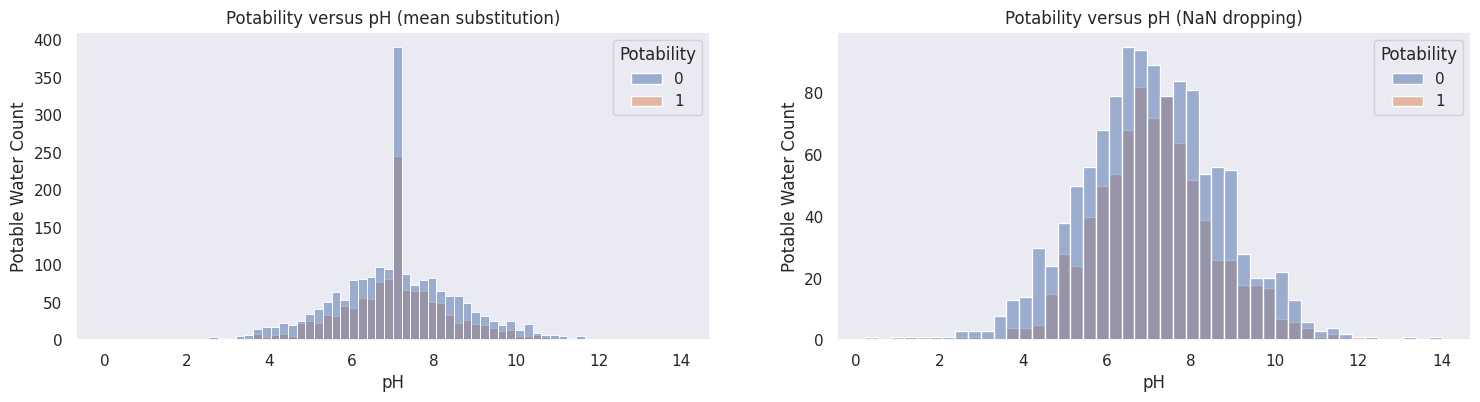

In [88]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="ph", color="b", hue="Potability");
plt.title("Potability versus pH (mean substitution)")
plt.xlabel("pH")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="ph", color="b", hue="Potability");
plt.title("Potability versus pH (NaN dropping)")
plt.xlabel("pH")
plt.ylabel("Potable Water Count")
plt.grid(False)

pH doesn't tell me any useful information about potability. 0 and 1 have almost same distribution.

Except for first graph which says that there are so much potable water samples where pH is about 7. It could've been due to mean substitution rather than a real correletion.

#### 2.2) Hardness

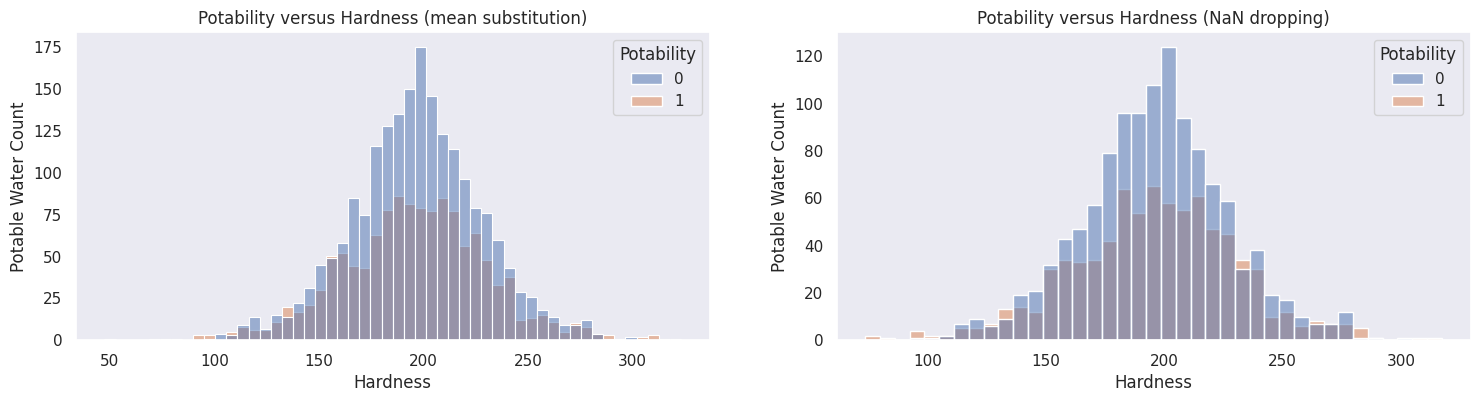

In [89]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Hardness", color="b", hue="Potability");
plt.title("Potability versus Hardness (mean substitution)")
plt.xlabel("Hardness")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Hardness", color="b", hue="Potability");
plt.title("Potability versus Hardness (NaN dropping)")
plt.xlabel("Hardness")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Hardness levels about 170-220 have higher potability rates

#### 2.3) Solids

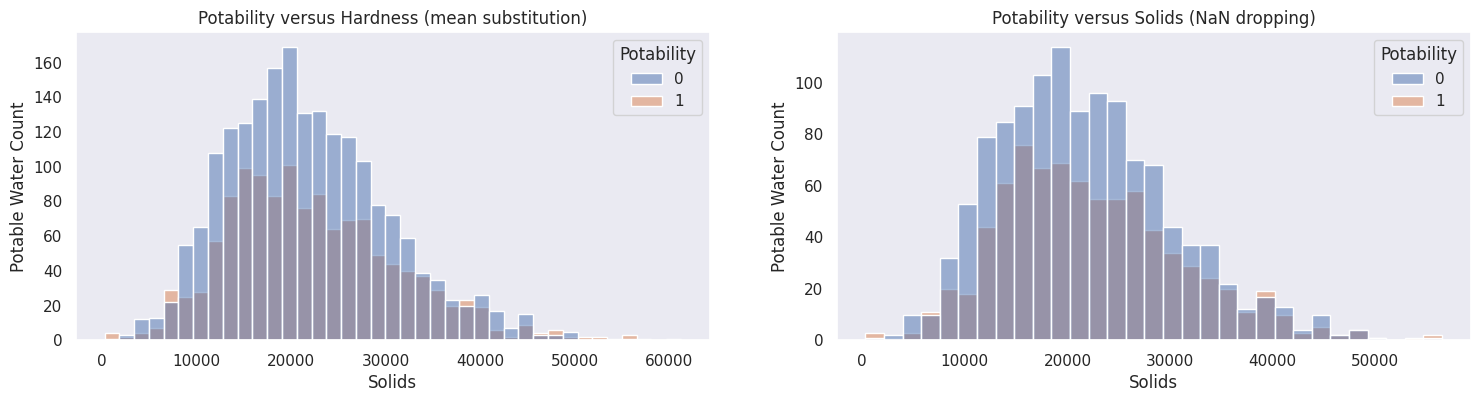

In [90]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Solids", color="b", hue="Potability");
plt.title("Potability versus Hardness (mean substitution)")
plt.xlabel("Solids")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Solids", color="b", hue="Potability");
plt.title("Potability versus Solids (NaN dropping)")
plt.xlabel("Solids")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Solid levels about 20k have higher potability rates

#### 2.4) Chloramines

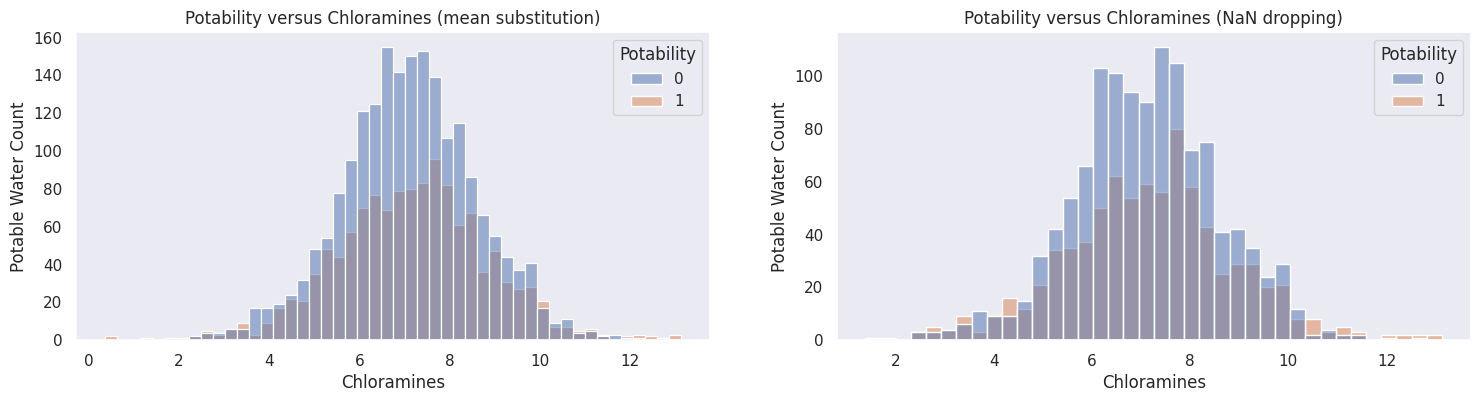

In [91]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Chloramines", color="b", hue="Potability");
plt.title("Potability versus Chloramines (mean substitution)")
plt.xlabel("Chloramines")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Chloramines", color="b", hue="Potability");
plt.title("Potability versus Chloramines (NaN dropping)")
plt.xlabel("Chloramines")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Chloramine levels about 6-7 have higher potability rates

#### 2.5) Sulfate

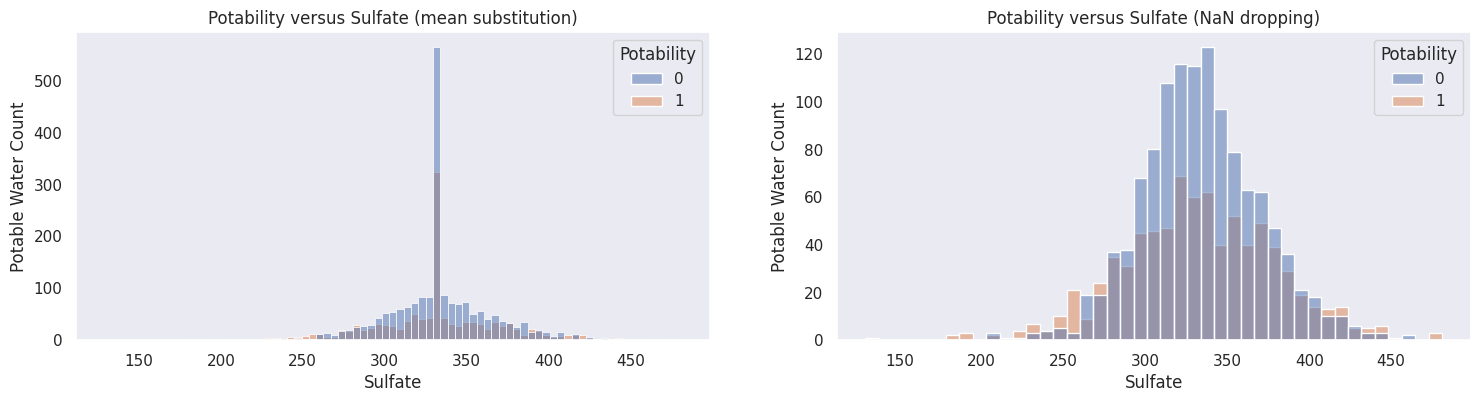

In [92]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Sulfate", color="b", hue="Potability");
plt.title("Potability versus Sulfate (mean substitution)")
plt.xlabel("Sulfate")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Sulfate", color="b", hue="Potability");
plt.title("Potability versus Sulfate (NaN dropping)")
plt.xlabel("Sulfate")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Sulfate levels about 300-350 have higher potability rates

#### 2.6) Conductivity

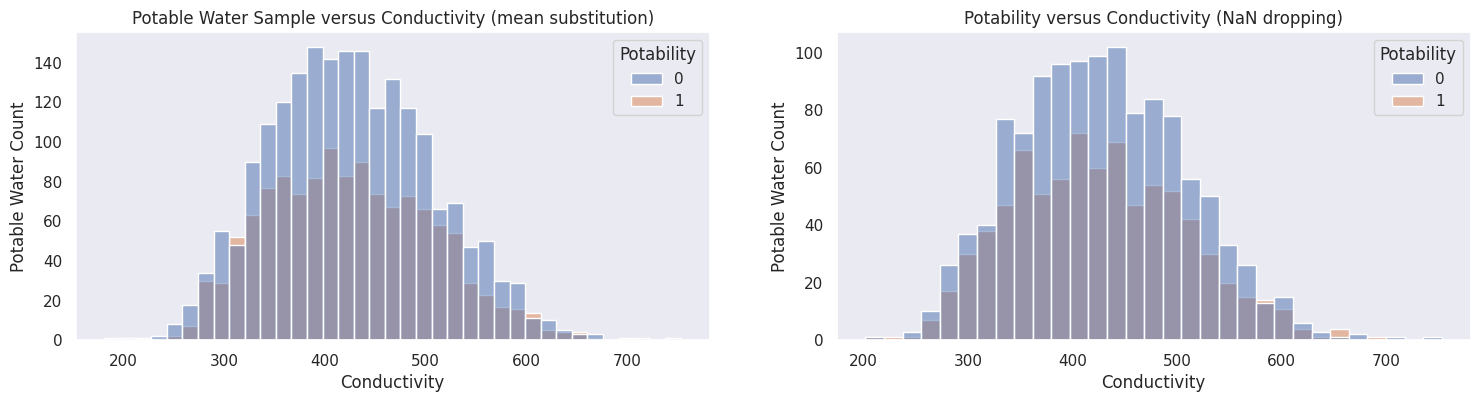

In [93]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Conductivity", color="b", hue="Potability");
plt.title("Potable Water Sample versus Conductivity (mean substitution)")
plt.xlabel("Conductivity")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Conductivity", color="b", hue="Potability");
plt.title("Potability versus Conductivity (NaN dropping)")
plt.xlabel("Conductivity")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Conductivity levels about 350-500 have higher potability rates

#### 2.7) Organic Carbon

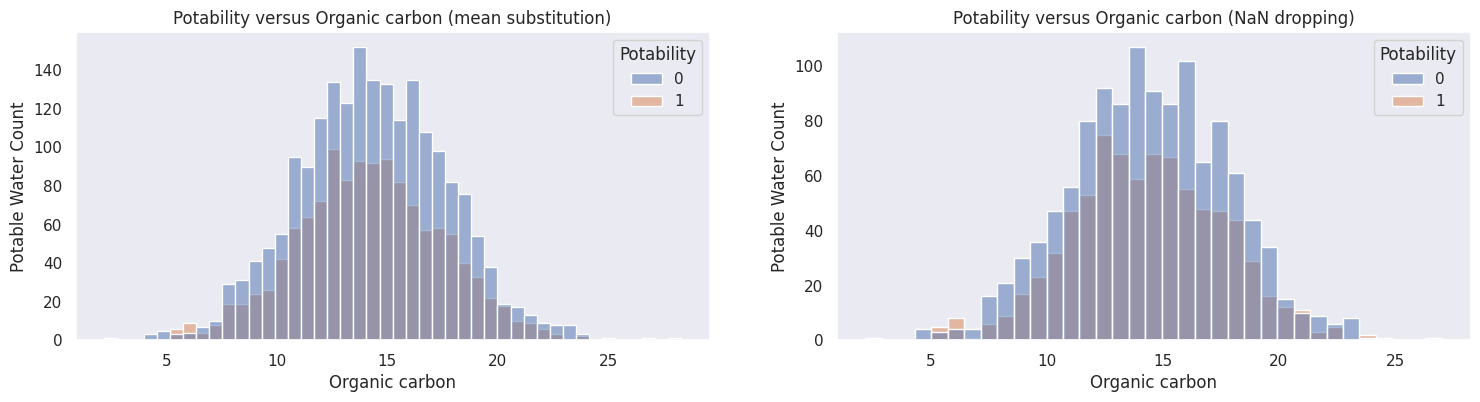

In [94]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Organic_carbon", color="b", hue="Potability");
plt.title("Potability versus Organic carbon (mean substitution)")
plt.xlabel("Organic carbon")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Organic_carbon", color="b", hue="Potability");
plt.title("Potability versus Organic carbon (NaN dropping)")
plt.xlabel("Organic carbon")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Organic Carbon levels about 13-16 have higher potability rates

#### 2.8) Trihalomethanes

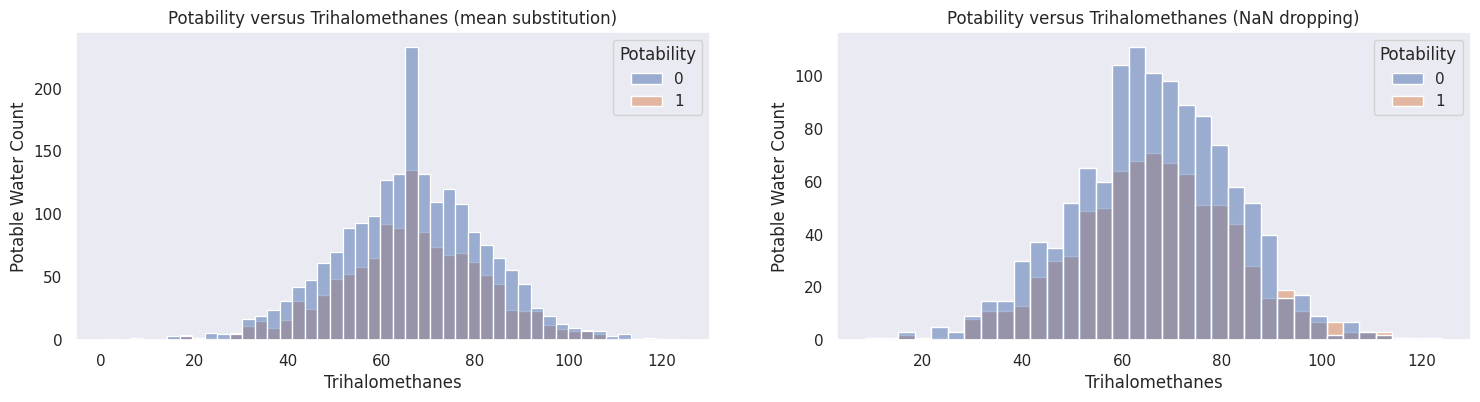

In [95]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Trihalomethanes", color="b", hue="Potability");
plt.title("Potability versus Trihalomethanes (mean substitution)")
plt.xlabel("Trihalomethanes")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Trihalomethanes", color="b", hue="Potability");
plt.title("Potability versus Trihalomethanes (NaN dropping)")
plt.xlabel("Trihalomethanes")
plt.ylabel("Potable Water Count")
plt.grid(False)

These two charts are pretty different eachother. The NaN dropped one should've been the most trustworthly one because there were no data value manipulation.

Then, Trihalomethane levels about 60-80 have higher potability rates considering second chart.

#### 2.10) Turbidity

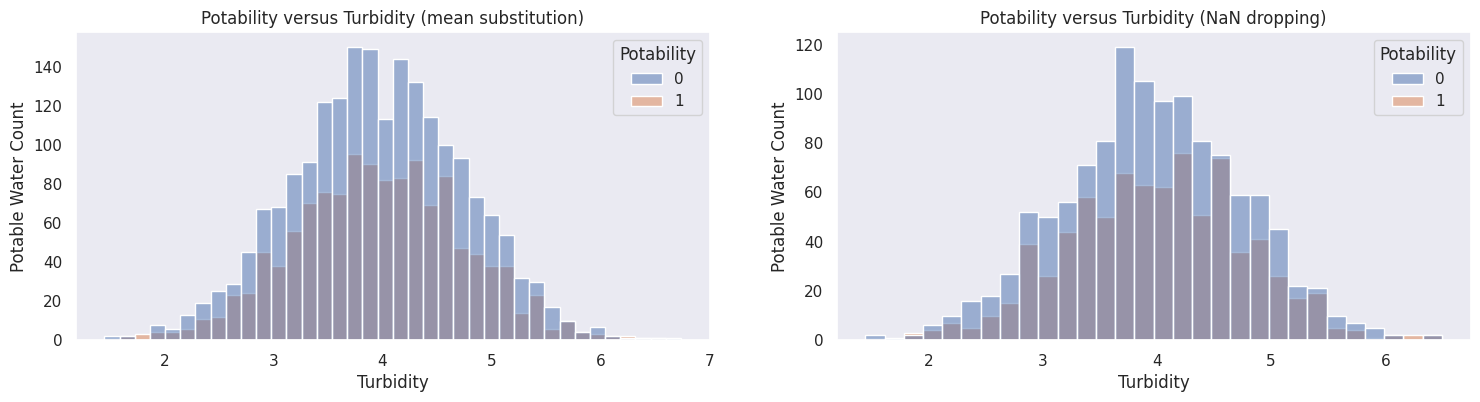

In [96]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df_m, x="Turbidity", color="b", hue="Potability");
plt.title("Potability versus Turbidity (mean substitution)")
plt.xlabel("Turbidity")
plt.ylabel("Potable Water Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df_d, x="Turbidity", color="b", hue="Potability");
plt.title("Potability versus Turbidity (NaN dropping)")
plt.xlabel("Turbidity")
plt.ylabel("Potable Water Count")
plt.grid(False)

Both charts agree with that Turbidity levels about 3.5-4.5 have higher potability rates

#### 2.11) Insights
In conclusion, the best way to treat this dataset seems to be to drop the records with NaN values instead of substituting NaN with mean.

In addition, there are no parameters which defines potability in abrupt way o more than others in considerable way, but the water potability seems to be a combination of parameters which values must fall between some ranges.
* pH is about 7
* Hardness levels about 170-220
* Chloramine levels about 6-7
* Sulfate levels about 300-350
* Organic Carbon levels about 13-16
* Trihalomethane levels about 60-80
* Turbidity levels about 3.5-4.5

### 3) Dataset Preparation and Model Building

This section is reserved for developing models for predictive analysis.
I can consider different solutions:

**Machine Learning**:
* Random Forest for Classification
* XGBoost for Classification
* Support Vector Machines
* Logistic regression

**Deep Learning**:
* Deep Neural Netoworks

#### 3.1) Dataset preparation and splitting

#### a) Dataset preparation

In [25]:
#Features-Label splitting
X = df_d[['ph', 
          'Hardness', 
          'Solids', 
          'Chloramines', 
          'Sulfate', 
          'Conductivity',
          'Organic_carbon', 
          'Trihalomethanes', 
          'Turbidity']]

Y = df_d['Potability']

Xbk = X.loc[:,:]
Ybk = Y.loc[:]

In [26]:
X.shape

(3276, 9)

#### b) Dataset splitting

In [10]:
#backup sets that will be used later
x_trainbk, x_testbk, y_trainbk, y_testbk = train_test_split(Xbk, Ybk, 
                                                            test_size=0.01, 
                                                            random_state=0)
print(f"X train shape: {x_trainbk.shape}")
print(f"X test shape: {x_testbk.shape}")

X train shape: (3243, 9)
X test shape: (33, 9)


#### 3.2) Model Building

This section is reserved for model exploration. Where different Machine Learning and Deep learning models will be impelented to reach high accuracy labelling

##### 3.2.1) Random Forest

In [16]:
#Iterate through features number, in order to check witch is the better max_depth for Random Forest Classifier
r2_score = []
max_depth = 100
for depth in range(1, max_depth):
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    pipe_in = [('scaler', StandardScaler()),
               ('model', RandomForestClassifier(max_depth=depth, 
                                                random_state=0))]
    pipe = Pipeline(pipe_in)
    pipe.fit(x_train, y_train)
    r2_score.append(pipe.score(x_test, y_test))

In [17]:
print(f"Maximum R2 score: {max(r2_score) :<.4f}")
print(f"Maximum R2 score requires max_depth: {r2_score.index(max(r2_score))+1}")

Maximum R2 score: 0.7879
Maximum R2 score requires max_depth: 12


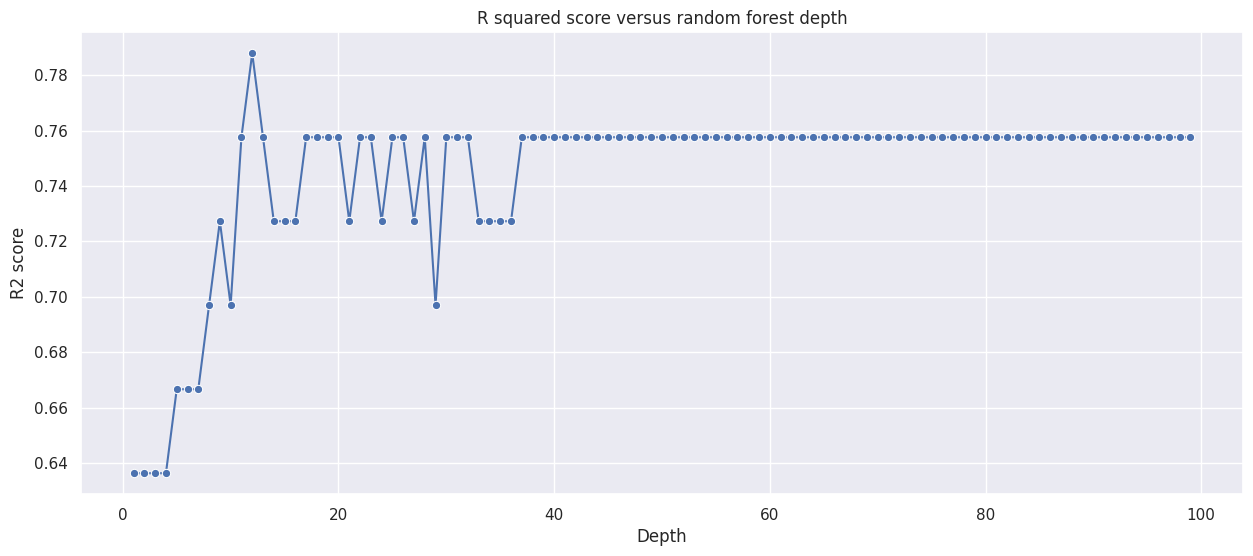

In [18]:
plt.figure(figsize=(15,6))
sns.lineplot(y=r2_score, x=np.arange(1,max_depth), marker="o")
plt.title("R squared score versus random forest depth")
plt.xlabel("Depth")
plt.ylabel("R2 score");

To reach Maximum test accuracy, RandomForest classifier requires 12 depth

let's include also Polynomial Feature Transformation

In [157]:
r2_score = []
max_degree = 10
for degree in range(1, max_degree):
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    pipe_in = [('scaler', StandardScaler()),
               ('polyt', PolynomialFeatures(degree=degree)),
               ('model', RandomForestClassifier(max_depth=12, 
                                                random_state=32))]
    pipe = Pipeline(pipe_in)
    pipe.fit(x_train, y_train)
    r2_score.append(pipe.score(x_test, y_test))

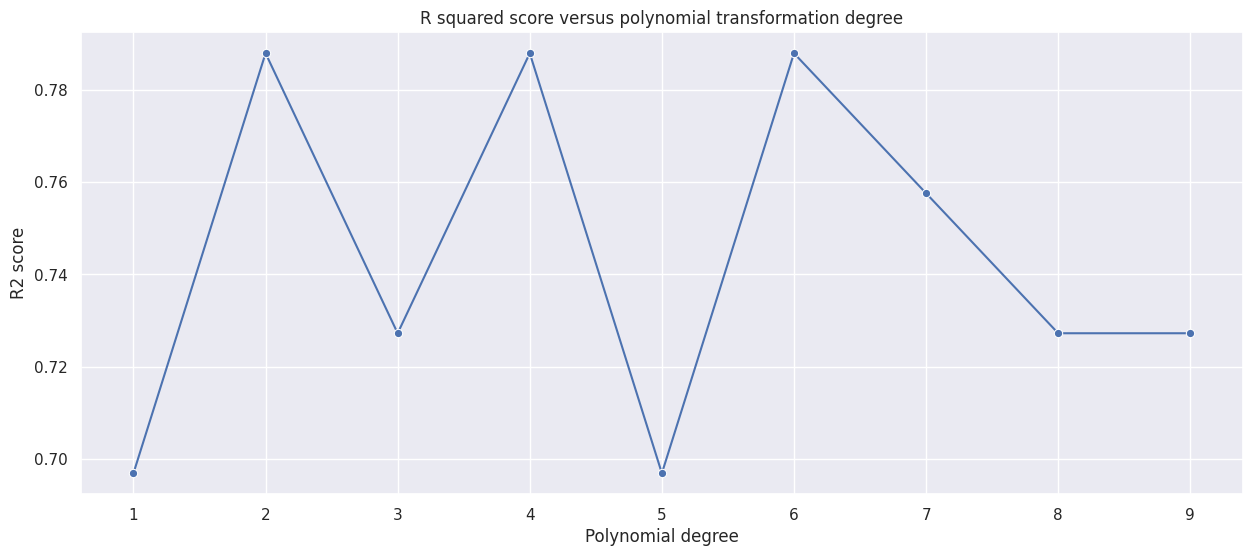

In [158]:
plt.figure(figsize=(15,6))
sns.lineplot(y=r2_score, x=np.arange(1, max_degree), marker="o")
plt.title("R squared score versus polynomial transformation degree")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score");

In [159]:
print(f"Maximum R2 score: {max(r2_score) :<.4f}")
print(f"Maximum R2 score requires degree: {r2_score.index(max(r2_score))+1}")

Maximum R2 score: 0.7879
Maximum R2 score requires degree: 2


It doen't seem a good classifier. Considering my aim is 90%, this RandomForest doesn't generalize enough

##### 3.2.2) XGBoost Classifier

In [160]:
#Iterate through learning rate, in order to check witch is the better for XGBOOST
r2_score = []
lr_arr = np.linspace(1e-4, 1e-3, 50)
for lr in lr_arr:
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    pipe_in = [('scaler', StandardScaler()),
               ('model', XGBClassifier(eta = lr))]
    pipe = Pipeline(pipe_in)
    pipe.fit(x_train, y_train)
    r2_score.append(pipe.score(x_test, y_test))

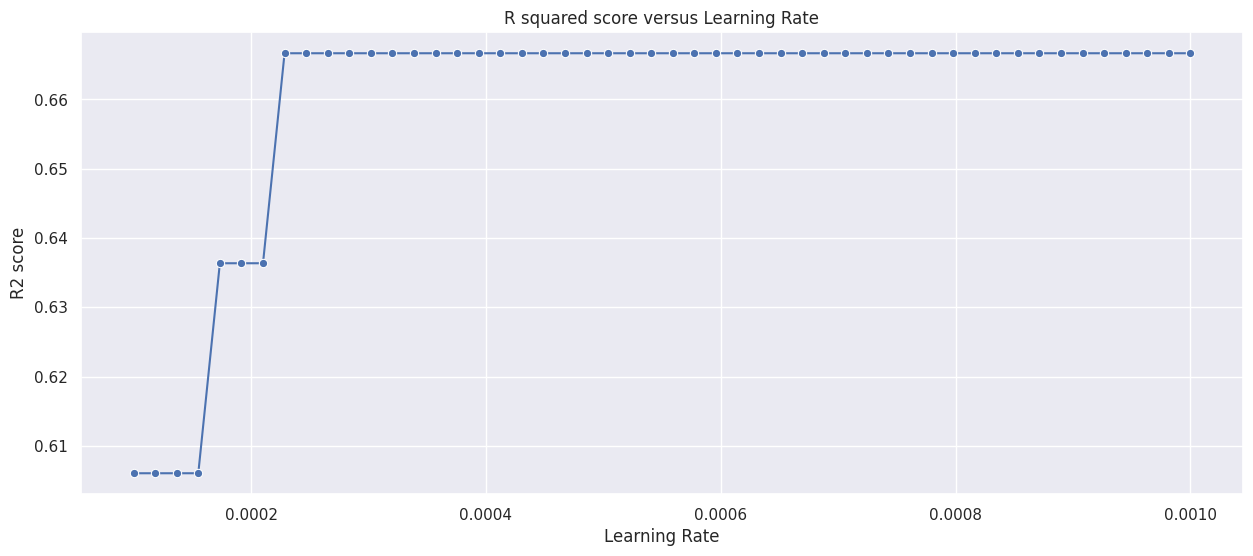

In [161]:
plt.figure(figsize=(15,6))
sns.lineplot(y=r2_score, x= lr_arr, marker="o")
plt.title("R squared score versus Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("R2 score");

In [162]:
print(f"Maximum R2 score: {max(r2_score) :<.4f}")

Maximum R2 score: 0.6667


Very bad result

##### 3.2.3) Support Vector Machines

In [163]:
#Iterate through features number, in order to check witch is the better max_depth for Random Forest Classifier
r2_score = {}
max_degree = 10
kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    tmp_array = []
    for degree in range(1, max_degree):
        x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
        pipe_in = [('scaler', StandardScaler()),
                   ('svm', SVC(kernel=kernel,
                               gamma="auto",
                               degree=degree))]
        pipe = Pipeline(pipe_in)
        pipe.fit(x_train, y_train)
        tmp_array.append(pipe.score(x_test, y_test))
    r2_score[kernel] = tmp_array

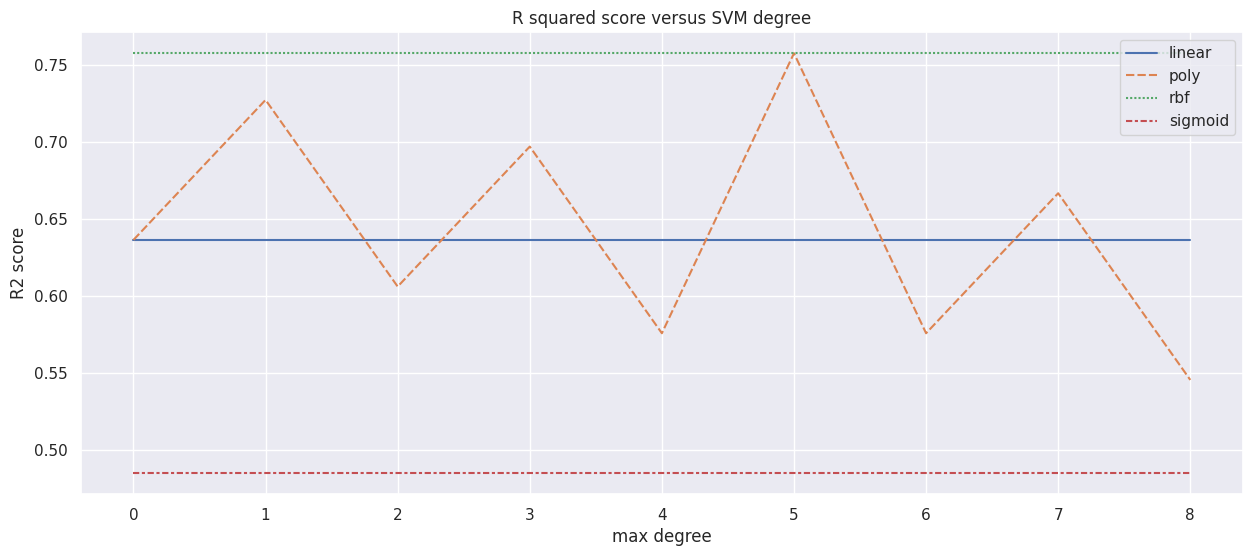

In [164]:
plt.figure(figsize=(15,6))
sns.lineplot(r2_score);
plt.title("R squared score versus SVM degree")
plt.xlabel("max degree")
plt.ylabel("R2 score");

It seems that poly of fifth degree and rbf kernels show best performance in terms of R2 square. but it is still low

##### 3.2.4) Logistic Regression

In [165]:
#Iterate through features number, in order to check witch is the better max_depth for Random Forest Classifier
r2_score = []
max_degree = 10
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
for solver in solvers:
    tmp_array = []
    pipe_in = [('scaler', StandardScaler()),
               ('logreg', LogisticRegression(random_state=0, 
                                             solver=solver))]
    pipe = Pipeline(pipe_in)
    pipe.fit(x_train, y_train)
    r2_score.append(pipe.score(x_test, y_test))

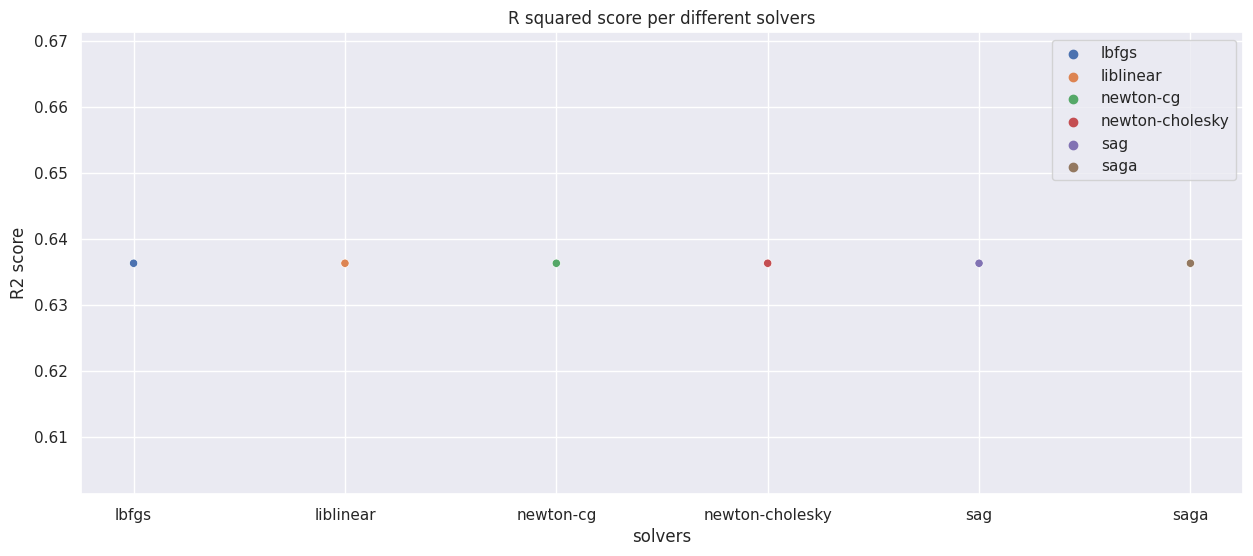

In [166]:
plt.figure(figsize=(15,6))
sns.scatterplot(y=r2_score, x=solvers, hue=solvers);
plt.title("R squared score per different solvers")
plt.xlabel("solvers")
plt.ylabel("R2 score");

Pretty Bad, thery are all overlapped on almost 0.64

##### 3.2.5) Deep Learning

**Data Augmentation, Feature Engineering and Regularization**

##### Augmentation
I chose 10% of standard deviation just because it's value might be reasonably low. I want specify that it is only by rule of thumb chosen.

It is required to make more research for being ensure that the augmentation or reducing of some values don't make the water unpotable and viceversa.

Therefore consider the following operations as only a simple exercise.

In [27]:
#Augmentation
concat_factor = 5
std = 0.1

for time in range(concat_factor):
    X = pd.concat([X, Xbk.add(np.random.normal(0, std, Xbk.shape[1]))])
    Y = pd.concat([Y, Ybk])

In [28]:
#backup sets that will be used later
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.015, 
                                                    random_state=0)
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")

X train shape: (19361, 9)
X test shape: (295, 9)


##### Feature Engineering

In [29]:
#Creation of squared features
for column in x_train.columns:
    x_train[f"{column}_sq"] = np.square(x_train[column])
    x_test[f"{column}_sq"] = np.square(x_test[column])
    
#Creating upper-mean-variables 
#if value lower than column mean 0, else 1 (mc stand for mean category)
for column in x_train.columns:
    x_train[f"{column}_mc"] = x_train[column].apply(lambda x: 1.0 if x > x_train[column].mean() else 0.0)
    x_test[f"{column}_mc"] = x_test[column].apply(lambda x: 1.0 if x > x_train[column].mean() else 0.0)

In [30]:
print(f"X new shape {x_train.shape}")
print(f"Y new shape {y_train.shape}")

X new shape (19361, 36)
Y new shape (19361,)


In [31]:
#Data Standard score Normalizaion (x-μ)/σ only for continous variables
for column in x_train.columns:
    if ("_mc" not in column):
        print(f"{column:<20}modified")
        x_train[column] = (x_train[column] - x_train[column].mean())/x_train[column].std()
        x_test[column] = (x_test[column] - x_test[column].mean())/x_test[column].std() 

ph                  modified
Hardness            modified
Solids              modified
Chloramines         modified
Sulfate             modified
Conductivity        modified
Organic_carbon      modified
Trihalomethanes     modified
Turbidity           modified
ph_sq               modified
Hardness_sq         modified
Solids_sq           modified
Chloramines_sq      modified
Sulfate_sq          modified
Conductivity_sq     modified
Organic_carbon_sq   modified
Trihalomethanes_sq  modified
Turbidity_sq        modified


In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19361 entries, 3182 to 2732
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ph                     19361 non-null  float64
 1   Hardness               19361 non-null  float64
 2   Solids                 19361 non-null  float64
 3   Chloramines            19361 non-null  float64
 4   Sulfate                19361 non-null  float64
 5   Conductivity           19361 non-null  float64
 6   Organic_carbon         19361 non-null  float64
 7   Trihalomethanes        19361 non-null  float64
 8   Turbidity              19361 non-null  float64
 9   ph_sq                  19361 non-null  float64
 10  Hardness_sq            19361 non-null  float64
 11  Solids_sq              19361 non-null  float64
 12  Chloramines_sq         19361 non-null  float64
 13  Sulfate_sq             19361 non-null  float64
 14  Conductivity_sq        19361 non-null  float64
 15  Organ

In [51]:
model = tf.keras.Sequential([ 
            tf.keras.layers.Dense(16, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.0001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(256, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.0001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(512, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(256, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.0001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(16, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.0001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.0001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.0001))])

In [52]:
flag = True
class StopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ( logs.get('val_accuracy') > 0.96): 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True
            global flag 
            flag = False
            
class PrintCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 50 == 0 and \
            logs.get('val_accuracy') is not None and \
            logs.get('accuracy') is not None):
            
            print(f"Epoch: {epoch: <6}")
            print(f"{'Valid_acc: ' :<6}{logs.get('val_accuracy') : <7.4f}")
            print(f"{'Train_acc: ' :<6}{logs.get('accuracy') : <7.4f}")
            
sp_cb = StopCallback()
check_cb = PrintCallback()

In [53]:
epochs_a = [200,  200,  1400, 1000, 3000, 1000]
lr_a =     [1e-3, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
history = []
for epochs, lr in zip(epochs_a, lr_a):
    if (flag == True):
        print("###############")
        print(f"Epochs : {epochs}")
        print(f"L.Rate : {lr}")
        print("###############")
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      metrics=['accuracy']) 
        history.append(model.fit(x_train, 
                                 y_train, 
                                 epochs=epochs,
                                 batch_size=2048,
                                 validation_data=(x_test, y_test),
                                 callbacks=[check_cb, sp_cb],
                                 verbose=0))
    else:
        pass

###############
Epochs : 200
L.Rate : 0.001
###############
Epoch: 0     
Valid_acc: 0.4237 
Train_acc: 0.5710 
Epoch: 50    
Valid_acc: 0.4000 
Train_acc: 0.5547 
Epoch: 100   
Valid_acc: 0.5797 
Train_acc: 0.6106 
Epoch: 150   
Valid_acc: 0.5898 
Train_acc: 0.6443 
###############
Epochs : 200
L.Rate : 0.0001
###############
Epoch: 0     
Valid_acc: 0.5492 
Train_acc: 0.5741 
Epoch: 50    
Valid_acc: 0.6102 
Train_acc: 0.6589 
Epoch: 100   
Valid_acc: 0.6576 
Train_acc: 0.7031 
Epoch: 150   
Valid_acc: 0.6712 
Train_acc: 0.7302 
###############
Epochs : 1400
L.Rate : 5e-05
###############
Epoch: 0     
Valid_acc: 0.7220 
Train_acc: 0.7858 
Epoch: 50    
Valid_acc: 0.7966 
Train_acc: 0.8732 
Epoch: 100   
Valid_acc: 0.9085 
Train_acc: 0.9525 

Reached wanted accuracy so cancelling training!


In [57]:
print(f"Test Accuracy reached: {model.evaluate(x_test, y_test, verbose=1)[1]*100 : <.2f}%")

10/10 [==============================] - 0s 4ms/step - loss: 0.7833 - accuracy: 0.9627
Test Accuracy reached: 96.27%


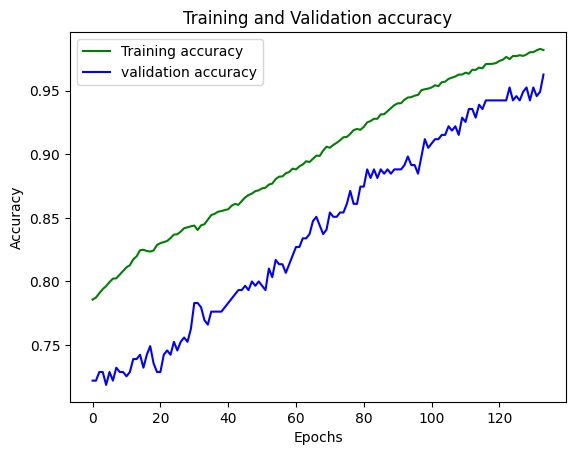

In [58]:
epoch_range = np.arange(1, history[-1].epoch[-1]+2)
train_accuracy = history[-1].history['accuracy']
val_accuracy = history[-1].history['val_accuracy']

plt.plot(train_accuracy, 'g', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Conclusion Insights
This results is very interesting and the reached accuracy is very high: 96.27%.

The suitable system for water potability required a network with 274,097 trainable parameters (see below).

It is a good results and at the end of this study I reached an interesting target value.

The next step might be an application development where the network itself is mounted on a microcontroller device for run-time water monitoring.

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                592       
                                                                 
 batch_normalization_25 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 256)               4352      
                                                                 
 batch_normalization_26 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_27 (Bat  (None, 512)             